In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from config import ORIGINAL_EXCEL_PATH, WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN, WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN, RISK_1_COLUMN

from data_preperation import read_excel_df, fix_df

In [2]:
%%time
topic_modeling_df = read_excel_df(ORIGINAL_EXCEL_PATH)
topic_modeling_df = fix_df(topic_modeling_df)
topic_modeling_df.columns

CPU times: user 4.86 s, sys: 39.4 ms, total: 4.9 s
Wall time: 4.9 s


Index(['עמודה', 'app', 'law', 'country', 'prolific_id', 'age', 'gender',
       'tounge', 'English.proficiency', 'Legal.education', 'Legal.Experience',
       'app_description', 'paragraph', 'paragraph.title', 'is.ethical',
       'why.not.ethical', 'Manual Classification', 'Comment', 'Risk 1',
       'Risk 2', 'Risk 3', 'Risk 4', 'New risk', 'why.not.ethical_clean',
       'why.not.ethical_clean_word_count'],
      dtype='object')

In [3]:
Counter(topic_modeling_df[RISK_1_COLUMN]).most_common()

[('dp&p uninformed consent', 1264),
 ('onesided terms', 1172),
 ('collection of personal data', 526),
 ('other limitation of liability', 477),
 ('third party data transfers', 457),
 ('limited readability', 417),
 ('limitation of liability', 259),
 ('unfair terms', 239),
 ('storage and retention of personal data', 207),
 ('user content ownership', 187),
 ('data security', 176),
 ('uninformed consent', 159),
 ('tracking user information', 143),
 ('no refunds', 143),
 ('restricting user legal action - general', 141),
 ('dispute resolution clause', 125),
 ('limiting class action', 102),
 ('burdens associated with using the app - general', 57),
 ('international data transfers', 57),
 ('financial risks - general', 52),
 ('legally non compliant', 49),
 ('privacy risks', 46),
 ('processing user information', 44),
 ('eliminating or limiting access to purchased app assets or coins', 38),
 ('in app payments', 33),
 ('advertisements and spam', 32),
 ('severability', 25),
 ('functionality', 21),
 (

In [4]:
topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN].sample(5)

23864    They shouldn't in their sole discretion have t...
5020     I am not a resident of Isreal, therefore, aski...
13636    Apple should not be allowed to decide whether ...
14888                allows NEXTERS free access to content
24870    It is unfair that users who block cookies will...
Name: why.not.ethical_clean, dtype: object

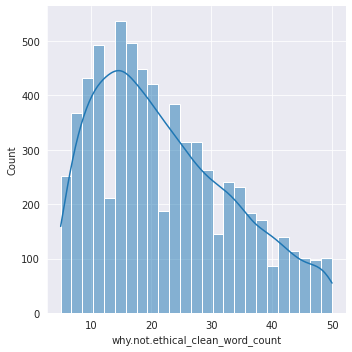

In [5]:
sns.displot(topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_WORD_COUNT_COLUMN], kde=True) # we can choose min and max word count based on this graph

In [6]:
why_not_ethical_text = " ".join(topic_modeling_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN])
why_not_ethical_text_words = why_not_ethical_text.split()

In [7]:
Counter(why_not_ethical_text_words).most_common()

[('to', 6660),
 ('the', 6344),
 ('is', 3682),
 ('be', 3477),
 ('of', 2871),
 ('not', 2621),
 ('and', 2525),
 ('should', 2401),
 ('a', 2045),
 ('they', 1992),
 ('that', 1964),
 ('for', 1858),
 ('data', 1663),
 ('it', 1496),
 ('in', 1319),
 ('information', 1297),
 ('It', 1282),
 ('unethical', 1239),
 ('you', 1223),
 ('or', 1180),
 ('are', 1140),
 ('your', 1139),
 ('have', 1096),
 ('their', 1093),
 ('any', 986),
 ('if', 983),
 ('as', 945),
 ('The', 941),
 ('user', 873),
 ('personal', 856),
 ('with', 853),
 ('can', 838),
 ('this', 832),
 ('They', 802),
 ('without', 734),
 ('on', 711),
 ('will', 675),
 ('users', 642),
 ('may', 641),
 ('company', 601),
 ('This', 555),
 ('from', 550),
 ('use', 546),
 ('no', 535),
 ('third', 526),
 ('an', 524),
 ('I', 520),
 ('which', 519),
 ('by', 486),
 ('what', 471),
 ('app', 440),
 ('at', 434),
 ('able', 432),
 ('other', 422),
 ('terms', 416),
 ('do', 412),
 ('does', 400),
 ('because', 392),
 ('access', 378),
 ('all', 377),
 ('game', 374),
 ('account', 362

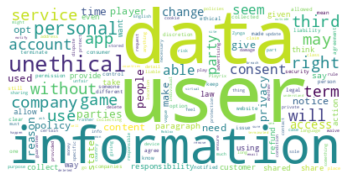

In [8]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(why_not_ethical_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
topic_modeling_df.head()

,עמודה,app,law,country,prolific_id,age,gender,tounge,English.proficiency,Legal.education,...,why.not.ethical,Manual Classification,Comment,Risk 1,Risk 2,Risk 3,Risk 4,New risk,why.not.ethical_clean,why.not.ethical_clean_word_count
5,31,BrawlStars,L,U,603565b791eab63dace0d0d8,18.0,Female,English,Native,No,...,Its not exclusive to the person.,NaN,NaN,misundersood text,New external risk,NaN,NaN,NaN,Its not exclusive to the person.,6
12,12,BrawlStars,L,U,5f98e2cd2da42120a74ff562,22.0,Female,English,Native,I am currently a law student,...,The app cannot make the account owner liable f...,NaN,NaN,user content ownership,NaN,NaN,NaN,NaN,The app cannot make the account owner liable f...,24
13,191,BrawlStars,L,U,5ed3e3d0f34aac38d4321f02,24.0,Female,English,Native,I am currently a law student,...,Being responsible for anything that happens in...,NaN,NaN,third party data transfer,NaN,NaN,NaN,NaN,Being responsible for anything that happens in...,27
17,192,BrawlStars,L,U,5ed3e3d0f34aac38d4321f02,24.0,Female,English,Native,I am currently a law student,...,It's not so much unethical as it is vague.,NaN,NaN,third party data transfer,NaN,NaN,NaN,NaN,It's not so much unethical as it is vague.,9
21,193,BrawlStars,L,U,5ed3e3d0f34aac38d4321f02,24.0,Female,English,Native,I am currently a law student,...,The last portion about the terminating of the ...,NaN,NaN,limitation of liability - app will not become ...,MOVE,NaN,NaN,NaN,The last portion about the terminating of the ...,27


In [11]:
from copy import deepcopy
relevant_df = deepcopy(topic_modeling_df)
relevant_df = relevant_df[[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN, RISK_1_COLUMN]]

In [12]:
import re

def strip_non_alphanumerical_chars(text: str) -> str:
    clean_text = re.sub(r'[^a-zA-Z0-9 ]', r'', text)
    return clean_text

relevant_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN] = relevant_df.apply(lambda row: strip_non_alphanumerical_chars(row[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN]), axis=1)
relevant_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN] = relevant_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN].str.lower()

In [25]:
import pandas as pd
from config import EMBEDDING_COLUMN
from nltk import word_tokenize
# import nltk
# nltk.download("punkt")
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import itertools

# texts = np.array(relevant_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN]) #text contents in dataframe to array for processing

tf_idf_vectorizer = TfidfVectorizer(stop_words="english")
tf_idf = tf_idf_vectorizer.fit_transform(relevant_df[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN])
# vocab_length = len(word_tokenize(list(itertools.chain.from_iterable(texts))))
# print(vocab_length)



tf_idf_df = pd.DataFrame(tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names())
tf_idf_df.reset_index(drop=True, inplace=True)
relevant_df.reset_index(drop=True, inplace=True)

res_df = pd.concat([relevant_df, tf_idf_df], axis=1)
# relevant_df[EMBEDDING_COLUMN] = tf_idf.toarray()

/home/amit/python_envs/nlp_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
res_df.sample(3)

,why.not.ethical_clean,Risk 1,10,100,1000,10000,10days,11,12,13,...,young,younger,youre,youtube,youve,zero,zinga,zyga,zynga,zyngas
1963,although not necessary in israel you must comp...,dispute resolution clause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2666,allows nexters free access to content,user content ownership,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3052,i dont think you can pass on personally identi...,third party data transfers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
order_centroids.shape

(100, 5327)

In [31]:
from sklearn.cluster import KMeans

true_k = 100
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_df)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizer.get_feature_names()
for i in range(true_k):
    print(f"Cluster {i}")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]}")

Top terms per cluster:
Cluster 0
explanation
needs
terminate
shared
paragraph
changes
right
account
theyre
sorry
Cluster 1
unethical
users
user
does
company
right
paragraph
information
use
reason
Cluster 2
long
data
kept
necessary
time
information
personal
specify
want
stored
Cluster 3
user
letting
know
conduct
certainties
unknowingly
risky
idea
backup
anonymous
Cluster 4
people
information
unethical
data
game
access
different
like
dont
privacy
Cluster 5
liable
company
account
nexters
activities
solely
things
actions
loss
purchases
Cluster 6
collect
data
information
personal
unethical
consent
app
unnecessary
users
party
Cluster 7
says
data
personal
information
does
unethical
just
use
user
non
Cluster 8
app
information
users
data
unethical
using
user
personal
use
able
Cluster 9
players
group
information
zynga
owner
companies
roblox
messages
unethical
members
Cluster 10
transferred
data
information
country
countries
used
world
consent
treated
control
Cluster 11
advertising
data
companies

/home/amit/python_envs/nlp_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
